Opening path:  histos/plotsTopEFT.pkl.gz
 >> looking for histograms...
Output histogram saved in temp.png


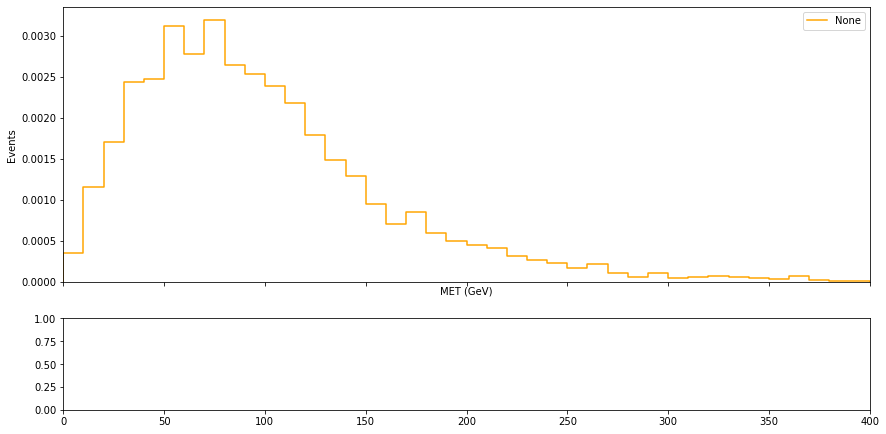

In [4]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
import numpy as np
from coffea import hist, processor
from coffea.hist import plot
from cycler import cycler

import sys
sys.path.append('..')

from topcoffea.plotter.OutText import OutText


path = 'histos/plotsTopEFT.pkl.gz'
outname = 'temp.png'

# Select variable, channel and cuts
var = 'met'
channel = ['eemSSonZ', 'eemSSoffZ', 'mmeSSonZ', 'mmeSSoffZ','eeeSSonZ', 'eeeSSoffZ', 'mmmSSonZ', 'mmmSSoffZ']
cut = 'base'

print('Opening path: ', path)
hists = {}
with gzip.open(path) as fin:
  hin = pickle.load(fin)
  print(' >> looking for histograms...')
  for k in hin.keys():
    if k in hists: hists[k]+=hin[k]
    else:          hists[k]=hin[k]


# Create figure
fig, (ax, rax) = plt.subplots(2, 1, figsize=(14,7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# Select the histogram var, channel and cut
h = hists[var]
h = h.integrate('channel', channel)
h = h.integrate('cut', cut)

# Integrate over samples
h = h.sum('sample')
 
# Plot and save figure to outname
hist.plot1d(h, ax=ax, line_opts={'color':'orange'})
fig.savefig(outname)
print('Output histogram saved in %s'%outname)